In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', class_='table')
table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

In [6]:
# Create an empty list
mars_temp=[]
# Loop through the scraped data to create a list of rows
rows = table.find_all('tr', class_='data-row')
for row in rows:
    data = row.find_all('td')
    row_data=[td.text.strip() for td in data]
    mars_temp.append(row_data)
mars_temp

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_header = table.find_all('th')

headers=[]
for header in table_header:
    title=header.text
    headers.append(title)

temp_df=pd.DataFrame(mars_temp)
temp_df.columns=headers

In [8]:
# Confirm DataFrame was created successfully
temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [9]:
# Examine data type of each column
temp_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
temp_df['terrestrial_date']=pd.to_datetime(temp_df['terrestrial_date'])
temp_df['sol']=temp_df['sol'].astype('int64')
temp_df['ls']=temp_df['ls'].astype('int64')
temp_df['month']=temp_df['month'].astype('int64')
temp_df['min_temp']=temp_df['min_temp'].astype(float)
temp_df['pressure']=temp_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
temp_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [12]:
# 1. How many months are there on Mars?
months=temp_df['month'].nunique()
temp_df['month'].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
totalDays=temp_df['sol'].nunique()
totalDays

1867

In [14]:
# 3. What is the average low temperature by month?
avg_min_temp=[]

for i in range(1,months+1):
    weather_per_month={"month":"","avg_min_temp":""}
    avg_min_temp_month=temp_df.loc[temp_df['month']==i]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,0)
    weather_per_month["month"] = i
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month)    

avg_min_temp_df=pd.DataFrame(avg_min_temp)
avg_min_temp_df

,month,avg_min_temp
0,1,-77.0
1,2,-80.0
2,3,-83.0
3,4,-83.0
4,5,-79.0
5,6,-75.0
6,7,-72.0
7,8,-68.0
8,9,-69.0
9,10,-72.0


(-87.15, 0.0)

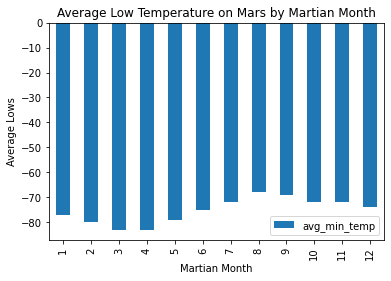

In [15]:
# Plot the average temperature by month

avg_min_temp_df.plot.bar("month","avg_min_temp");
plt.title("Average Low Temperature on Mars by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Lows")
plt.ylim()

(-87.15, 0.0)

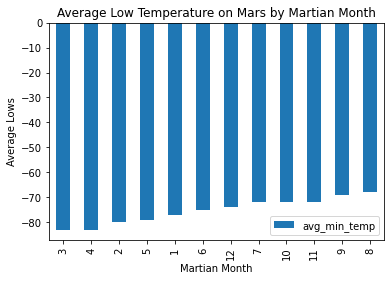

In [16]:
# Identify the coldest and hottest months in Curiosity's location
avg_min_temp_df_sort=avg_min_temp_df.sort_values('avg_min_temp')

avg_min_temp_df_sort.plot.bar("month","avg_min_temp");
plt.title("Average Low Temperature on Mars by Martian Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Lows")
plt.ylim()

In [17]:
# 4. Average pressure by Martian month
df_by_month=temp_df.groupby('month')
pressure_df=df_by_month.mean().loc[:,['pressure']]
pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


(0.0, 958.9712686567165)

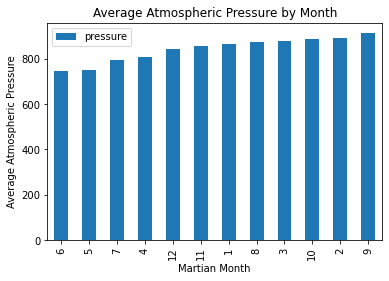

In [18]:
# Plot the average pressure by month
pressure_df_sort=pressure_df.sort_values('pressure')
pressure_df_sort
pressure_df_sort.plot.bar();
plt.title("Average Atmospheric Pressure by Month")
plt.xlabel("Martian Month")
plt.ylabel("Average Atmospheric Pressure")
plt.ylim()

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
orig_long=temp_df['ls'].loc[0]
orig_long

155

In [20]:
same_long=temp_df.loc[temp_df['ls']==orig_long]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [21]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

a=same_long['terrestrial_date'].loc[0]
date_after_one_martial_year = same_long['terrestrial_date'].iloc[1]
one_martial_year= date_after_one_martial_year-a
one_martial_year

Timedelta('686 days 00:00:00')

Text(0.5, 1.0, 'Daily Minimum Temperature')

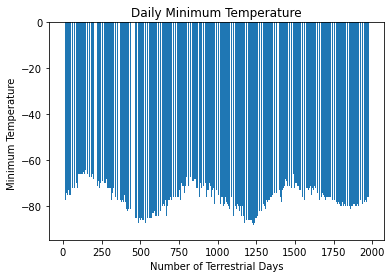

In [22]:
# Ploting martian days
plt.bar(temp_df['sol'],temp_df['min_temp'])

plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily Minimum Temperature')

In [23]:
# Export the DataFrame to a CSV file
temp_df.to_csv('mars_temperature_data.csv',index=False)

In [24]:
browser.quit()